In [65]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [69]:
# Load tortoise data
tortoise = pd.read_csv("Tortoises.csv")

In [71]:
print(tortoise)

    Length  Clutch
0      284       3
1      290       2
2      290       7
3      290       7
4      298      11
5      299      12
6      302      10
7      306       8
8      306       8
9      309       9
10     310      10
11     311      13
12     317       7
13     317       9
14     320       6
15     323      13
16     334       2
17     334       8


In [73]:
# Store relevant columns as variables
X = tortoise["Length"]
y = tortoise["Clutch"]

In [75]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [77]:
# Create a linear model using the training set and predictions using the test set
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
linModel = LinearRegression()
linModel.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = np.ravel(linModel.predict(X_test.reshape(-1, 1)))

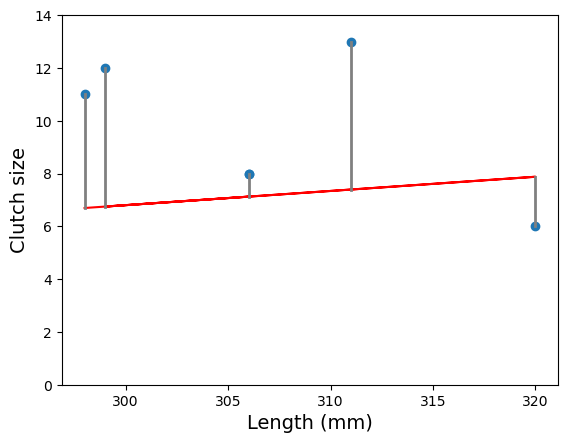

In [79]:
# Display linear model and scatter plot of the test set
plt.scatter(X_test, y_test)
plt.xlabel("Length (mm)", fontsize=14)
plt.ylabel("Clutch size", fontsize=14)
plt.plot(X_test, y_pred, color='red')
plt.ylim([0, 14])
for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [81]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

13.76992070647642

In [83]:
# Display RMSE
metrics.root_mean_squared_error(y_test, y_pred)

3.7107843788714563

In [85]:
# Display MAE
metrics.mean_absolute_error(y_test, y_pred)

3.132264529058117

In [87]:
# Create a quadratic model using the training set and predictions using the test set
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
poly = PolynomialFeatures().fit_transform(X_train.reshape(-1, 1))
poly_reg_model = LinearRegression().fit(poly, y_train)
poly_test = PolynomialFeatures().fit_transform(X_test.reshape(-1, 1))
y_pred = poly_reg_model.predict(poly_test)

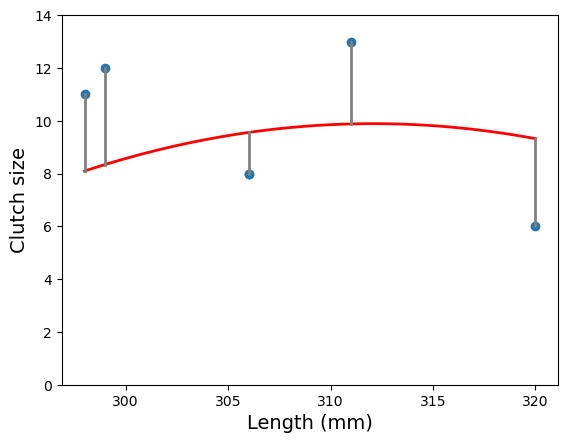

In [89]:
# Display quadratic model and scatter plot of the test set
plt.scatter(X_test, y_test)
plt.xlabel("Length (mm)", fontsize=14)
plt.ylabel("Clutch size", fontsize=14)
x = np.linspace(X_test.min(), X_test.max(), 100)
y = (
    poly_reg_model.coef_[2] * x**2
    + poly_reg_model.coef_[1] * x
    + poly_reg_model.intercept_
)
plt.plot(x, y, color='red', linewidth=2)
plt.ylim([0, 14])
for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [91]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

7.905956918576538

In [93]:
# Display RMSE
metrics.root_mean_squared_error(y_test, y_pred)

2.8117533530835415

In [95]:
# Display MAE
metrics.mean_absolute_error(y_test, y_pred)

2.6860332375250286